In [50]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
from IPython.display import Latex

from dataset import population_data
from vmls import gram_schmidt

# 10.1 Matrix-matrix multiplication

In [2]:
A = np.array([[-1.5, 3, 2],
              [1, -1, 0]])  # 2 by 3 matrix
B = np.array([[-1, -1],
              [0, -2],
              [1, 0]])  # 3 by 2 matrix
C = A @ B

print('A:')
print(A)
print('B:')
print(B)
print('C:')
print(C)

A:
[[-1.5  3.   2. ]
 [ 1.  -1.   0. ]]
B:
[[-1 -1]
 [ 0 -2]
 [ 1  0]]
C:
[[ 3.5 -4.5]
 [-1.   1. ]]


In [3]:
C = np.matmul(A, B)
print(C)

[[ 3.5 -4.5]
 [-1.   1. ]]


## Scalar-vector product

In [4]:
a = np.array([[4]])
x = np.array([[1],
              [7],
              [6]])
print('x:')
print(x)
print('a:')
print(a)
print('xa:')
print(x @ a)

x:
[[1]
 [7]
 [6]]
a:
[[4]]
xa:
[[ 4]
 [28]
 [24]]


## Inner product

In [5]:
a = np.random.randint(0, 5, size=(3, 1))
b = np.random.randint(0, 5, size=(3, 1))

print('a:')
print(a)
print('b:')
print(b)
display(Latex('$a^Tb$:'))
print(a.T @ b)

a:
[[1]
 [2]
 [0]]
b:
[[2]
 [2]
 [1]]


<IPython.core.display.Latex object>

[[6]]


## Matrix-vector multiplication

In [6]:
A = np.random.randint(0, 5, size=(3, 4))
x = np.random.randint(0, 5, size=(4, 1))

print('A:')
print(A)
print('x:')
print(x)
display(Latex('$Ax$:'))
print(A @ x)

A:
[[3 3 1 3]
 [0 3 0 0]
 [2 0 0 2]]
x:
[[4]
 [3]
 [1]
 [1]]


<IPython.core.display.Latex object>

[[25]
 [ 9]
 [10]]


## Vector outer product

In [7]:
a = np.random.randint(0, 5, size=(4, 1))
b = np.random.randint(0, 5, size=(3, 1))

print('a:')
print(a)
print('b:')
print(b)
display(Latex('$ab^T$:'))
print(a @ b.T)

a:
[[3]
 [1]
 [4]
 [2]]
b:
[[4]
 [4]
 [4]]


<IPython.core.display.Latex object>

[[12 12 12]
 [ 4  4  4]
 [16 16 16]
 [ 8  8  8]]


## Properties of matrix multiplication

We assume that $A$, $B$, and $C$ are matrices for which all the operations below are valid, and that $\gamma$ is a scalar.
- Associativity: $(AB)C = A(BC)$.
- Associativity with scalar multiplication: $\gamma(AB) = (\gamma A)B$
- Distributivity with addition: $A(B+C) = AB+AC$ and $(A+B)C = AC+BC$
- Transpose of product: $(AB)^T = B^T A^T$
- Multiplication by identity: $AI = A$ and $IA = A$
- $AB = BA$ does not hold in general

In [8]:
m = 4
p = 5
n = 3

A = np.random.randint(0, 5, size=(m, p))
B = np.random.randint(0, 5, size=(p, p))
C = np.random.randint(0, 5, size=(p, n))

print((A @ B) @ C)
print(A @ (B @ C))

[[257 209 181]
 [172 138 124]
 [354 301 301]
 [468 396 379]]
[[257 209 181]
 [172 138 124]
 [354 301 301]
 [468 396 379]]


In [9]:
a = 3
m = 4
p = 5
n = 3

A = np.random.randint(0, 5, size=(m, p))
B = np.random.randint(0, 5, size=(p, n))

print(3 * (A @ B))
print((3 * A) @ B)

[[66 30 54]
 [27 45 69]
 [36 33 51]
 [78 66 90]]
[[66 30 54]
 [27 45 69]
 [36 33 51]
 [78 66 90]]


In [10]:
m = 4
p = 5
n = 3

A = np.random.randint(0, 5, size=(m, p))
B = np.random.randint(0, 5, size=(p, n))
C = np.random.randint(0, 5, size=(p, n))

print(A @ (B + C))
print(A @ B + A @ C)

[[49 45 50]
 [30 26 26]
 [77 46 52]
 [38 26 29]]
[[49 45 50]
 [30 26 26]
 [77 46 52]
 [38 26 29]]


In [11]:
m = 4
p = 5
n = 3

A = np.random.randint(0, 5, size=(m, p))
B = np.random.randint(0, 5, size=(p, n))

print((A @ B).T)
print(B.T @ A.T)

[[ 0 10  4 14]
 [ 1 19 14 17]
 [ 5 25 27 23]]
[[ 0 10  4 14]
 [ 1 19 14 17]
 [ 5 25 27 23]]


## Inner product and matrix-vector products

$A$ is m × n, $x$ is an n-vector, and $y$ is an m-vector, then
$$y^T(Ax) = (y^T A)x = (A^Ty)^T x$$
i.e., the inner product of $y$ and $Ax$ is equal to the inner product of $x$ and $A^T y$.

In [12]:
m = 4
n = 3
A = np.random.randint(0, 5, size=(m, n))
x = np.random.randint(0, 5, size=(n, 1))
y = np.random.randint(0, 5, size=(m, 1))

print(y.T @ (A @ x))
print((A.T @ y).T @ x)

[[156]]
[[156]]


## Products of block matrices

$$
\begin{bmatrix}
A & B \\
C & D 
\end{bmatrix}
\begin{bmatrix}
E & F \\
G & H 
\end{bmatrix}
=
\begin{bmatrix}
AE + BG & AF + BH \\
CE + DG & CF + DH 
\end{bmatrix}
$$

## Column interpretation of matrix-matrix product

$$AB = A\begin{bmatrix}b_1 & b_2 & \cdots & b_n\end{bmatrix}= \begin{bmatrix} Ab_1 & Ab_2 & \cdots & Ab_n\end{bmatrix}$$

## Row interpretation of matrix-matrix product

Let $a^T_1, \ldots , a^T_m$ be the rows of A. Then we have

$$
AB = 
\begin{bmatrix}
a^T_1 \\
a^T_2 \\
\vdots \\
a^T_m
\end{bmatrix}
B
=
\begin{bmatrix}
a^T_1 B \\
a^T_2 B \\
\vdots \\
a^T_mB
\end{bmatrix}
=
\begin{bmatrix}
(B^T a_1)^T \\
(B^T a_2)^T \\
\vdots \\
(B^T a_m)^T
\end{bmatrix}
$$


# Outer product representation

We express the m × p matrix $A$ in terms of its columns $a_1, \ldots, a_p$ and the p × n matrix B in terms of its rows $b^T_1, \ldots, b^T_p$,

$$
A = \begin{bmatrix}
a_1 & \cdots & a_p
\end{bmatrix}
, \quad
B = \begin{bmatrix}
b^T_1 \\
\vdots \\
b^T_p
\end{bmatrix}
$$

then we can express the product matrix AB as a sum of outer products:

$$
AB = a_1 b^T_1 + \cdots + a_p b^T_p
$$

# Gram matrix

The Gram matrix of a matrix $A$ is the matrix $G = A^T A$. 
It is a symmetric matrix and the $i$, $j$ element $G_{i,j}$ is the inner product of columns $i$ and $j$ of $A$
$$G^T = (A^T A)^T = (A^T) (A^T)^T = A^T A = G$$

In [14]:
A = np.random.normal(size = (10,3))
G = A.T @ A
print(G)

[[ 5.25101531  0.9836884  -4.17198426]
 [ 0.9836884   9.22344518  1.3352915 ]
 [-4.17198426  1.3352915  21.32894309]]


In [15]:
# Gii is norm of column i, squared
G[1, 1]

9.223445175305121

In [16]:
np.linalg.norm(A[:, 1])**2

9.223445175305121

In [17]:
# Gij is inner product of columns i and j
G[0, 2]

-4.171984264172848

In [20]:
A[:, 0] @ A[:, 2]

-4.171984264172849

# Complexity of matrix triple product

Let’s check the associative property, which states
that (AB)C = A(BC) for any m×n matrix A, any n×p matrix B, and any p×q matrix
C. At the same time we will see that the left-hand and right-hand sides take very different
amounts of time to compute.

In [25]:
m = 2000
n = 50
 = 2000
p = 2000
 = np.random.normal(size = (m,n))
= np.random.normal(size = (n,p))
C = np.random.normal(size = (p,q))

In [29]:
%timeit LHS = (A @ B) @ C  # 2mp(n + q) flops
LHS = (A @ B) @ C

107 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
%timeit RHS = A @ (B @ C)  # 2nq(m + p) flops
RHS = A @ (B @ C)

13.4 ms ± 417 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
np.linalg.norm(LHS - RHS)

5.009930209010526e-10

In [35]:
%timeit D = A @ B @ C  # Evaluated as (A@B)@C or as A@(B@C)?

104 ms ± 8.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 10.2 Composition of linear functions

## Matrix-matrix products and composition

Suppose $A$ is an m × p matrix and $B$ is p × n. We can associate with these matrices two linear functions $f : \mathbb{R}^p \rightarrow \mathbb{R}^m$ and $g : \mathbb{R}^n \rightarrow \mathbb{R}^p$, defined as $f(x) = Ax$ and $g(x) = Bx$. The composition of the two functions is the function $h : \mathbb{R}^n \rightarrow \mathbb{R}^m$ with

$$
h(x) = f(g(x)) = A(Bx) = (AB)x
$$

## Second difference matrix

In [36]:
D = lambda n: np.c_[-np.identity(n-1), np.zeros(n-1)] + np.c_[np.zeros(n-1), np.identity(n-1)]
D(5)

array([[-1.,  1.,  0.,  0.,  0.],
       [ 0., -1.,  1.,  0.,  0.],
       [ 0.,  0., -1.,  1.,  0.],
       [ 0.,  0.,  0., -1.,  1.]])

In [38]:
D(4)

array([[-1.,  1.,  0.,  0.],
       [ 0., -1.,  1.,  0.],
       [ 0.,  0., -1.,  1.]])

In [39]:
Delta = D(4) @ D(5)  # Second difference matrix
print(Delta)

[[ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]]


## Composition of affine functions

Suppose $f : \mathbb{R}^p \rightarrow \mathbb{R}^m$ is the affine function given by $f(x) = Ax + b$, and $g : \mathbb{R}^n \rightarrow \mathbb{R}^p$ is the affine function given by $g(x) = Cx + d$. The composition $h$ is given by

$$
h(x) = f(g(x)) = A(Cx + d) + b = (AC)x + (Ad + b) = \tilde{A}x + \tilde{b},
$$
where $\tilde{A} = AC,\ \tilde{b} = Ad + b$.

## Chain rule of differentiation

Let $f : \mathbb{R}^p \rightarrow \mathbb{R}^m$ and $g : \mathbb{R}^n \rightarrow \mathbb{R}^p$ be **differentiable** functions. The composition of $f$ and $g$ is defined as the function $h : \mathbb{R}^n \rightarrow \mathbb{R}^m$ with
$$h(x) = f(g(x)) = f(g1(x), . . . , gp(x))$$

Partial derivatives:
$$
\frac{\partial h_i}{\partial x_j}(z)
= \frac{\partial f_i}{\partial y_1}(g(z)) \frac{\partial g_1}{\partial x_j}(z)
+ \cdots 
+ \frac{\partial f_i}{\partial y_p}(g(z)) \frac{\partial g_p}{\partial x_j}(z)
$$
for $i = 1, \ldots, m$ and $j = 1, \ldots, n$.

This relation can be expressed concisely as a **matrix-matrix product**:
$$Dh(z) = Df(g(z))Dg(z)$$
The derivative matrix of $h$ at $z$ is the product of the derivative matrix of $f$ at $g(z)$ and the derivative matrix of $g$ at $z$.

The **first order Taylor approximation** of $h$ at $z$ can therefore be written as
$$
\hat{h}(z) 
= h(z) + Dh(z)(x-z)
= f(g(x)) +  Df(g(z))Dg(z)(x-z)
$$

The same result can be interpreted as a composition of two affine functions.

# 10.3 Matrix power

In [40]:
# adjacency
A = np.array([[0, 1, 0, 0, 1],
              [1, 0, 1, 0, 0],
              [0, 0, 1, 1, 1],
              [1, 0, 0, 0, 0],
              [0, 0, 0, 1, 0]])

np.linalg.matrix_power(A, 2)

array([[1, 0, 1, 1, 0],
       [0, 1, 1, 1, 2],
       [1, 0, 1, 2, 1],
       [0, 1, 0, 0, 1],
       [1, 0, 0, 0, 0]])

In [41]:
A @ A

array([[1, 0, 1, 1, 0],
       [0, 1, 1, 1, 2],
       [1, 0, 1, 2, 1],
       [0, 1, 0, 0, 1],
       [1, 0, 0, 0, 0]])

In [45]:
np.linalg.matrix_power(A, 8)

array([[18, 11, 15, 20, 20],
       [25, 14, 21, 28, 26],
       [24, 14, 20, 27, 26],
       [11,  6,  9, 12, 11],
       [ 6,  4,  5,  7,  7]])

In [46]:
num_of_cycles = np.diag(np.linalg.matrix_power(A, 8))
print(num_of_cycles)

[18 14 20 12  7]


## Population dynamics

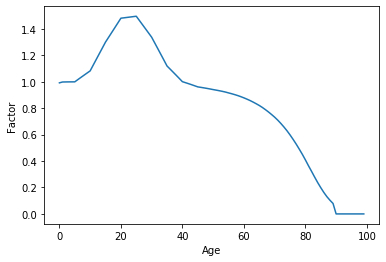

In [49]:
plt.ion()
D = population_data();
b = D['birth_rate'];
d = D['death_rate'];

# Dynamics matrix for populaion dynamics
A = np.vstack([b,
               np.column_stack([np.diag(1-d[:-1]), np.zeros((len(d)-1))])])

# Contribution factor to total poulation in 2020
# from each age in 2010
cf = np.ones(100) @ np.linalg.matrix_power(A, 10) # Contribution factor

plt.plot(cf)
plt.xlabel('Age')
plt.ylabel('Factor')
plt.show()

# 10.4 QR factorization

## Matrices with orthonormal columns

$$A^T A = I,$$
where $A$ is the n×k matrix with columns $a+1, \ldots, a_k$. There is no standard term for a matrix whose columns are orthonormal: We refer to a matrix whose columns are orthonormal as 'a matrix whose columns are orthonormal'. But a *square* matrix that satisfies $A^T A = I$ is called *orthogonal*; its columns are an orthonormal basis.

## Norm, inner product, and angle properties

Suppose the columns of the m × n matrix $A$ are *orthonormal*, and $x$ and $y$ are any n-vectors. We let $f : \mathbb{R}^n \rightarrow \mathbb{R}^m$ be the function that maps $z$ to $Az$

- $f$ preserves the inner product between vectors.

$$
\begin{align}
(Ax)^T(Ay)
&= (x^TA^T)(Ay) \\
&= x^T(A^TA)y \\
&= x^TIy \\
&= x^Ty
\end{align}
$$

- $f$ is norm preserving

$$
\begin{align}
\left\| Ax \right\|
&= \sqrt{(Ax)^T(Ax)} \\
&= \sqrt{x^Tx} \\
&= \left\| x \right\|
\end{align}
$$

- $f$ preserves angles between vectors.

$$
\angle(Ax, Ay)
= \arccos{\frac{(Ax)^T(Ay)}{\left\|Ax\right\| \left\|Ay\right\|}}
= \arccos{\frac{x^T y}{\left\|x\right\| \left\|y\right\|}}
= \angle(x, y)
$$

## QR factorization

$$A=QR$$
The equation $Q^T Q = I$ follows from the orthonormality of the vectors $q_1, \ldots, q_k$. The matrix $R$ is upper triangular because each vector $a_i$ is a linear combination of $q_1, \ldots, q_i$.

The Gram–Schmidt algorithm is not the only algorithm for QR factorization. Several other QR factorization algorithms exist, that are more reliable in the presence of round-off errors.

You can refer to https://en.wikipedia.org/wiki/QR_decomposition#Computing_the_QR_decomposition to see other algorithms.

In [51]:
def QR_factorization(A):
    Q_transpose = np.array(gram_schmidt(A.T))
    R = Q_transpose @ A
    Q = Q_transpose.T
    return Q, R
    Q, R = QR_factorization(A)

In [55]:
A = np.random.normal(size = (6,4))
Q, R = np.linalg.qr(A)
q, r = QR_factorization(A)

Vectors are linearly independent.


In [57]:
Q

array([[-0.00370264, -0.55700317,  0.18075507,  0.06713369],
       [ 0.4683758 , -0.27923937,  0.62756198, -0.27369696],
       [ 0.72029579,  0.35894896, -0.39811374, -0.08976478],
       [ 0.08974803, -0.4824891 , -0.47041682, -0.64638723],
       [-0.47677813,  0.3141264 ,  0.07303832, -0.63194272],
       [-0.16251857, -0.38917524, -0.43401893,  0.30879973]])

In [58]:
R

array([[ 3.03432063, -2.09559862, -0.33819297,  0.01562734],
       [ 0.        , -1.32791269, -0.2371698 ,  0.96625251],
       [ 0.        ,  0.        , -2.12304669, -1.23548137],
       [ 0.        ,  0.        ,  0.        ,  1.80849372]])

In [59]:
q

array([[-0.00370264,  0.55700317, -0.18075507,  0.06713369],
       [ 0.4683758 ,  0.27923937, -0.62756198, -0.27369696],
       [ 0.72029579, -0.35894896,  0.39811374, -0.08976478],
       [ 0.08974803,  0.4824891 ,  0.47041682, -0.64638723],
       [-0.47677813, -0.3141264 , -0.07303832, -0.63194272],
       [-0.16251857,  0.38917524,  0.43401893,  0.30879973]])

In [60]:
r

array([[ 3.03432063e+00, -2.09559862e+00, -3.38192973e-01,
         1.56273400e-02],
       [-5.55111512e-17,  1.32791269e+00,  2.37169798e-01,
        -9.66252515e-01],
       [-2.22044605e-16,  0.00000000e+00,  2.12304669e+00,
         1.23548137e+00],
       [ 3.33066907e-16, -8.32667268e-17, -3.67761377e-16,
         1.80849372e+00]])